# Fashion MNIST

- MNIST 시리즈 학습은 지겹고도 지겹지만, 다시 해보자.

In [1]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

print(len(train_X), len(test_X))

4423680/4422102 [==============================] - 1s 0us/step
60000 10000


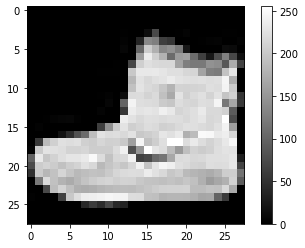

9


In [2]:
import matplotlib.pyplot as plt
plt.imshow(train_X[0], cmap='gray')
plt.colorbar()
plt.show()

print(train_Y[0])

In [3]:
train_X = train_X / 255.0
test_X = test_X / 255.0

print(train_X[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

### Sparse Matrix

- 대부분의 값이 0인 행렬을 Sparse Matrix라고 한다.

- Sparse Matrix에서 행렬이 클 경우, 0을 위한 메모리를 모두 확보하는 것은 낭비이다.

- 때문에 0이 아닌 숫자가 있는 위치와 그 숫자의 값만 저장하자!

> One-Hot Encoding이 아닌 정답 행렬을 찾기 위해서 loss function이 sparse categorical crossentropy로 변했다.  
> 이를 사용하면, 별도의 데이터 전처리 없이 Sparse Matrix을 나타내는 데이터를 정답 행렬로 사용할 수 있다.

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

Train on 45000 samples, validate on 15000 samples
Epoch 1/25
45000/45000 [==============================] - 2s 38us/sample - loss: 0.5167 - accuracy: 0.8187 - val_loss: 0.4328 - val_accuracy: 0.8462
Epoch 2/25
45000/45000 [==============================] - 2s 34us/sample - loss: 0.3858 - accuracy: 0.8610 - val_loss: 0.4043 - val_accuracy: 0.8548
Epoch 3/25
45000/45000 [==============================] - 2s 33us/sample - loss: 0.3467 - accuracy: 0.8740 - val_loss: 0.3467 - val_accuracy: 0.8756
Epoch 4/25
45000/45000 [==============================] - 2s 34us/sample - loss: 0.3168 - accuracy: 0.8832 - val_loss: 0.3670 - val_accuracy: 0.8617
Epoch 5/25
45000/45000 [==============================] - 2s 35us/sample - loss: 0.3003 - accuracy: 0.8877 - val_loss: 0.3479 - val_accuracy: 0.8756
Epoch 6/25
45000/45000 [==============================] - 2s 36us/sample - loss: 0.2825 - accuracy: 0.8968 - val_loss: 0.3468 - val_accuracy: 0.8770
Epoch 7/25
45000/45000 [==============================] 

#### Validation Data의 loss가 점점 감소하다가 서서히 증가하는 Overfitting을 볼 수 있다.

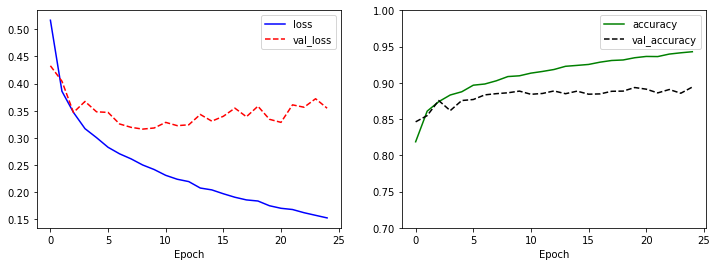

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [8]:
model.evaluate(test_X, test_Y)

10000/10000 [==============================] - 0s 17us/sample - loss: 0.3811 - accuracy: 0.8882


[0.38108458459377287, 0.8882]